In [5]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.style.use("seaborn")

# Formatear las etiquetas del eje y
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))

np.random.seed(42)

# Raw data

In [6]:
df = pd.concat([
    pd.read_excel(f)
    for f in glob("../etiquetado/revisado/*.xlsx")
]).reset_index(drop=True)
print(df.shape, df["index"].nunique())
df.head(2)

(31195, 12) 31195


,index,titulo,url,mensaje,fecha,frases,sesgo_pronombre,sesgo_otro,version_con_sesgo,version_sin_sesgo,potencialmente_sesgable_otro_sesgo,revisado
0,15000,Mañana 12:00 hrs. - Conmemoración del Wiñol Tr...,detalle?id=21091,Estimada comunidad FCFM: \n_x000D_\nJunto con ...,2018-06-19 17:18:19,"Chilkatufe UChile mew, estudiantes mapuche U. ...",NaN,NaN,NaN,NaN,No,Si
1,15001,Mañana 12:00 hrs. - Conmemoración del Wiñol Tr...,detalle?id=21091,Estimada comunidad FCFM: \n_x000D_\nJunto con ...,2018-06-19 17:18:19,"Biblioteca Central, FCFM Académicas mapuche, FCFM",NaN,NaN,NaN,NaN,No,Si


## Cleaning

In [7]:
df["sesgo_pronombre"] = df["sesgo_pronombre"].str.upper().str.replace("Í", "I").str.strip()
df["sesgo_pronombre"].value_counts(dropna=False)

NaN    21583
NO      6721
SI      2891
Name: sesgo_pronombre, dtype: int64

In [8]:
df["sesgo_otro"] = df["sesgo_otro"].str.upper().str.replace("Í", "I").str.strip()
df["sesgo_otro"].value_counts(dropna=False)

NaN    21583
NO      6277
SI      3335
Name: sesgo_otro, dtype: int64

In [9]:
df["potencialmente_sesgable_otro_sesgo"] = df["potencialmente_sesgable_otro_sesgo"].str.upper().str.replace("Í", "I").str.strip().fillna("NO")
df["potencialmente_sesgable_otro_sesgo"].value_counts(dropna=False)

NO    25045
SI     6150
Name: potencialmente_sesgable_otro_sesgo, dtype: int64

In [10]:
df["revisado"] = df["revisado"].str.upper().str.replace("Í", "I").str.strip()
df["revisado"].value_counts(dropna=False)

SI    31195
Name: revisado, dtype: int64

## QA

In [11]:
df[
    (df["sesgo_pronombre"] == "NO") & (df["sesgo_otro"] == "NO") & (df["frases"] != df["version_sin_sesgo"])
].head(15)

,index,titulo,url,mensaje,fecha,frases,sesgo_pronombre,sesgo_otro,version_con_sesgo,version_sin_sesgo,potencialmente_sesgable_otro_sesgo,revisado


In [12]:
df[
    ((df["sesgo_pronombre"] == "SI") | (df["sesgo_otro"] == "SI")) & (df["frases"] == df["version_sin_sesgo"])
].head(15)

,index,titulo,url,mensaje,fecha,frases,sesgo_pronombre,sesgo_otro,version_con_sesgo,version_sin_sesgo,potencialmente_sesgable_otro_sesgo,revisado


In [13]:
df[
    df["version_con_sesgo"] == df["version_sin_sesgo"]
].head(15)

,index,titulo,url,mensaje,fecha,frases,sesgo_pronombre,sesgo_otro,version_con_sesgo,version_sin_sesgo,potencialmente_sesgable_otro_sesgo,revisado


In [14]:
df[
    (df["sesgo_pronombre"] == "NO") & (df["sesgo_otro"] == "NO") & (df["frases"] == df["version_con_sesgo"])
].head(15)

,index,titulo,url,mensaje,fecha,frases,sesgo_pronombre,sesgo_otro,version_con_sesgo,version_sin_sesgo,potencialmente_sesgable_otro_sesgo,revisado


In [15]:
df[
    ((df["sesgo_pronombre"].isna()) & (df["sesgo_otro"].isna())) & ((df["version_con_sesgo"].notna()) | (df["version_sin_sesgo"].notna()))
].head(15)

,index,titulo,url,mensaje,fecha,frases,sesgo_pronombre,sesgo_otro,version_con_sesgo,version_sin_sesgo,potencialmente_sesgable_otro_sesgo,revisado


## Key Terms check

In [16]:
for _, r in df[
    df["version_sin_sesgo"].fillna("").str.lower().str.contains("nuestros y")
][["index", "version_sin_sesgo"]].iterrows():
    print(f"{r['index']} - {r['version_sin_sesgo']}\n")

7472 - Agradezco a cada uno/a de los/as integrantes de la comunidad FCFM por el esfuerzo que han realizado y siguen realizando para seguir ofreciendo el espacio formativo y de vida universitaria a nuestros y nuestras estudiantes.

30913 - Debido a que no es posible realizar en forma normal los controles recuperativos de MA100 INTRODUCCION AL CALCULO y  MA110 INTRODUCCION AL ALGEBRA,  este día sábado 24 de mayo,  por los problemas de acceso por vía terrestre de nuestros y nuestras estudiantes de regiones, estos se suspenden  y se han reprogramado  para el día jueves 5 de junio a las 18:00 horas.

18057 - Si quieres saber cómo nuestros y nuestras emprendedores y emprendedoras están cambiando el mundo con soluciones basadas en innovación tecnológica, no puedes perderte esta actividad que se realizará el jueves 3 de noviembre, desde las 13:15 hrs.

9799 - La Escuela valora la presencialidad para la rendición de evaluaciones y reconoce la importancia que tiene para medir en forma efectiva e

In [17]:
for _, r in df[
    df["version_sin_sesgo"].fillna("").str.lower().str.contains("de alumnos")
][["index", "version_sin_sesgo"]].iterrows():
    print(f"{r['index']} - {r['version_sin_sesgo']}\n")

27819 - El Centro de Alumnos y Alumnas de Ingeniería de Minas tiene el agrado de invitar a la comunidad a las actividades correspondientes a la tercera versión de la Semana Minera, mayor información www.semanaminera.cl afiche30x45.pdf Les esperamos!!!

27820 - Centro de Alumnos(as) de Ingeniería de Minas (CAM).

29056 - En el marco de la Semana Minera 2009 y como actividad final, El Centro de Alumnos(as) de Ingenieria Civil de Minas y Bhp Billiton invitan a estudiantes de plan común de 4° semestre a participar en la 2° visita a Minera Escondida durante el mes de Diciembre del presente año.

5009 - La Semana Redes 2021 es una actividad organizada por el centro de Alumnos y Alumnas del DCC (CaDCC), que tiene como objetivo presentar algunos de los temas centrales relativos al área de Redes.

5636 - Beauchefian@s: Con el objetivo de dar a conocer la carrera de Ingeniería Civil en Computación en sus diferentes aspectos, áreas de estudio y de desarrollo profesional, el Centro de Alumnos/as d

In [18]:
for _, r in df[
    (df["version_sin_sesgo"].fillna("").str.lower().str.contains(" ingenieros "))
][["index", "version_sin_sesgo"]].iterrows():
    print(f"{r['index']} - {r['version_sin_sesgo']}\n")

15129 - Estimada comunidad: El Colegio de Ingenieros e Ingenieras de Chile les invita a postular al concurso  "Innovando con Ingeniería" , que tiene por objeto incentivar una mirada innovadora, que sea capaz de integrar en forma productiva y efectiva las diversas soluciones tecnológicas que hoy están disponibles, reconociendo la importancia que ésta mirada tiene en los pasos que se tomen hacia el futuro, y vinculando a estudiantes tempranamente en la búsqueda de soluciones a problemas complejos y/o multidisciplinarios.

5423 - Premios Nacionales 2021 recibieron sus galardones en ceremonia presencial realizada en La MonedaAstrónomo FCFM participa en investigación que detectó galaxias escondidas en el polvo cósmicoInvestigadoas/res FCFM publican estudio sobre modelación de contaminantes en ríos afectados por drenaje ácidoInvestigación chileno-neozelandesa propone sistema de seguridad informática mediante ráfagas de luzInvestigador del DGF participa en estudio sobre tsunamis generados por

In [19]:
for _, r in df[
    (df["version_sin_sesgo"].fillna("").str.lower().str.contains(" beauchefianos "))
][["index", "version_sin_sesgo"]].iterrows():
    print(f"{r['index']} - {r['version_sin_sesgo']}\n")

27382 - Charla vocacional para Beauchefianas y Beauchefianos Especialidad: Ingeniería Eléctrica Expositor: Cristián Figueroa, Account Manager de SAS, una de las compañías de software más grandes del mundo; y ex alumno de la FCFM.

6342 - Científicas/os de la FCFM crean dispositivo que indica el riesgo de contagio por coronavirus en espacios cerrados Investigadores/as chilenos/as desarrollan sistema de procesamiento de datos que optimiza el estudio del universoDiez disciplinas de la FCFM destacan dentro del Ranking Shanghai 2021FCFM celebró y graduó a su nueva generación de beauchefianas y beauchefianos El rol de la electromovilidad y su aporte al desarrollo sostenible y a la ciudadanía Columna de opinión: ¿Deberíamos exigir el derecho a respirar un aire puro (y no morir en el intento)?

1716 - ¡Atención Beauchefianos y Beauchefianas!

11732 - BEAUCHEFERIA: El grupo organizado de beauchefianas y beauchefianos emprendedores y emprendedoras estará exponiendo sus productos vinculados al re

In [20]:
for _, r in df[
    (df["version_con_sesgo"].fillna("").str.lower().str.contains("alumnos/as", regex=False))
    & (df["version_sin_sesgo"].fillna("").str.lower().str.contains("alumn@s", regex=False))
][["index", "version_sin_sesgo", "version_con_sesgo"]].iterrows():
    print(f"{r['index']} - {r['version_con_sesgo']}")
    print(f"{r['index']} - {r['version_sin_sesgo']}\n")

# Bias EDA

In [21]:
sesgables = df[df["sesgo_pronombre"].notna()].copy()
sesgables.shape[0] / df.shape[0] * 100

30.812630229203396

In [22]:
sesgables[
    (sesgables["sesgo_pronombre"] == "SI") | (sesgables["sesgo_otro"] == "SI")
].shape[0] / sesgables.shape[0] * 100

60.133166874739906

In [23]:
sesgables["year"] = pd.to_datetime(sesgables["fecha"]).dt.year
sesgables["year"].value_counts()

2022    1031
2020    1027
2021     999
2019     679
2017     638
2010     629
2011     623
2018     585
2023     507
2012     475
2015     451
2016     449
2009     429
2014     390
2013     353
2008     319
2007      28
Name: year, dtype: int64

In [24]:
sesgables["sesgo"] = np.where(
    (sesgables["sesgo_pronombre"] == "SI") | (sesgables["sesgo_otro"] == "SI"), 1, 0
)

print(sesgables["sesgo"].value_counts("%"))

porc_sesgo = sesgables.groupby(["year"]).agg(porc_ses=("sesgo", lambda x: x.sum() / x.shape[0] * 100)).reset_index()
porc_sesgo

1    0.601332
0    0.398668
Name: sesgo, dtype: float64


,year,porc_ses
0,2007,96.428571
1,2008,90.595611
2,2009,91.608392
3,2010,90.461049
4,2011,87.640449
5,2012,80.000000
6,2013,83.852691
7,2014,89.743590
8,2015,80.931264
9,2016,75.946548


In [25]:
porc_sesgo["porc_ses"].describe()

count    17.000000
mean     68.769673
std      24.329994
min      27.449079
25%      44.773176
50%      80.000000
75%      89.743590
max      96.428571
Name: porc_ses, dtype: float64

## Test data

In [26]:
df_test = pd.read_csv("20231210_test_data_labeled.csv")
print(df_test.shape)
df_test.head(2)

(853, 6)


,input,target,sesgo_pronombre,sesgo_otro,seq2seq_document,causal_document
0,Estimada comunidad beauchefiana: ¿Tienes papel...,['Estimada comunidad beauchefiana: ¿Tienes pap...,NO,NO,Eliminar sesgo de género del siguiente texto:\...,<human>: ¿Puedes reescribir el siguiente texto...
1,Desde hoy y hasta el 19 de diciembre puedes de...,['Desde hoy y hasta el 19 de diciembre puedes ...,NaN,NaN,Eliminar sesgo de género del siguiente texto:\...,<human>: ¿Puedes reescribir el siguiente texto...


In [27]:
sesgables_test = df_test[df_test["sesgo_pronombre"].notna()]
sesgables_test.shape[0] / df_test.shape[0] * 100

39.624853458382184

In [28]:
sesgables_test["sesgo_pronombre"].value_counts(), sesgables_test["sesgo_otro"].value_counts()

(NO    301
 SI     37
 Name: sesgo_pronombre, dtype: int64,
 NO    317
 SI     21
 Name: sesgo_otro, dtype: int64)

In [29]:
sesgables_test[
    (sesgables_test["sesgo_pronombre"] == "SI") | (sesgables_test["sesgo_otro"] == "SI")
].shape[0] / sesgables_test.shape[0] * 100

17.159763313609467

In [30]:
sesgables_test.shape

(338, 6)

## Plots

In [31]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.3, random_state=42)

sesgable_train = train_df[train_df["sesgo_pronombre"].notna()]
sesgable_val = val_df[val_df["sesgo_pronombre"].notna()]
no_sesgable_train = train_df[train_df["sesgo_pronombre"].isna()]
no_sesgable_val = val_df[val_df["sesgo_pronombre"].isna()]
no_sesgables_test = df_test[df_test["sesgo_pronombre"].isna()]

In [32]:
print(sesgables.shape, sesgables_test.shape, sesgable_train.shape, sesgable_val.shape)
print(df.shape, df_test.shape, train_df.shape, val_df.shape)

(9612, 14) (338, 6) (6730, 12) (2882, 12)
(31195, 12) (853, 6) (21836, 12) (9359, 12)


In [33]:
print(df[df["sesgo_pronombre"].isna()].shape, no_sesgables_test.shape, no_sesgable_train.shape, no_sesgable_val.shape)

(21583, 12) (515, 6) (15106, 12) (6477, 12)


In [34]:
can_bias_plot = pd.DataFrame({
    'data': ['Entrenamiento', 'Entrenamiento', 'Validación', 'Validación', 'Prueba', 'Prueba'],
    'Tipo de frase': ['No pareable', 'Posible de parear', 'No pareable', 'Posible de parear', 'No pareable', 'Posible de parear'],
    'value': [15106, 6730, 6477, 2882, 520, 333]}
)

can_bias_plot['porcentaje'] = can_bias_plot.groupby(['data'])['value'].transform(lambda x: round(x / x.sum() * 100, 1))
can_bias_plot

,data,Tipo de frase,value,porcentaje
0,Entrenamiento,No pareable,15106,69.2
1,Entrenamiento,Posible de parear,6730,30.8
2,Validación,No pareable,6477,69.2
3,Validación,Posible de parear,2882,30.8
4,Prueba,No pareable,520,61.0
5,Prueba,Posible de parear,333,39.0


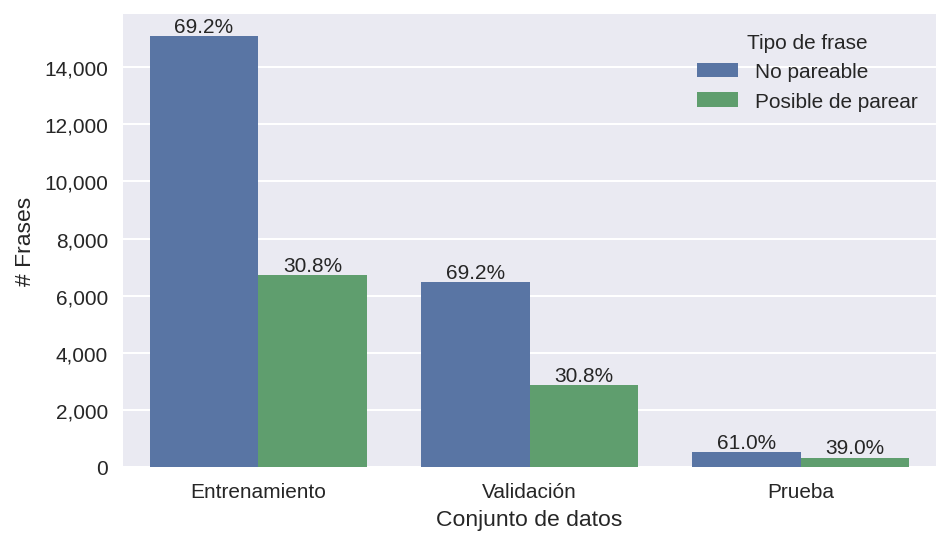

In [35]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=150)
sns.barplot(x='data', y='value', hue='Tipo de frase', data=can_bias_plot);

plt.gca().yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0], label_type='edge', labels=can_bias_plot[can_bias_plot["Tipo de frase"]=="No pareable"]['porcentaje'].astype(str) + "%")
ax.bar_label(ax.containers[1], label_type='edge', labels=can_bias_plot[can_bias_plot["Tipo de frase"]=="Posible de parear"]['porcentaje'].astype(str) + "%")

plt.ylabel("# Frases")
plt.xlabel("Conjunto de datos");
#plt.title("Cantidad de frases posibles y no posibles de parear para cada conjunto de datos", pad=10);

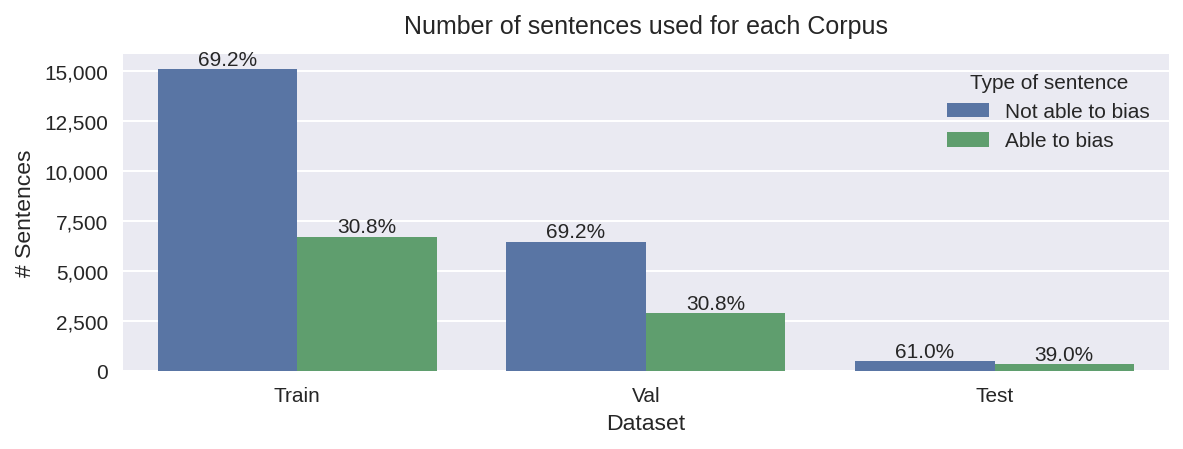

In [41]:
can_bias_plot_en = pd.DataFrame({
    'data': ['Train', 'Train', 'Val', 'Val', 'Test', 'Test'],
    'Type of sentence': ['Not able to bias', 'Able to bias', 'Not able to bias', 'Able to bias', 'Not able to bias', 'Able to bias'],
    'value': [15106, 6730, 6477, 2882, 520, 333]}
)

can_bias_plot_en['porcentaje'] = can_bias_plot_en.groupby(['data'])['value'].transform(lambda x: round(x / x.sum() * 100, 1))

fig, ax = plt.subplots(figsize=(9, 2.8), dpi=150)
sns.barplot(x='data', y='value', hue='Type of sentence', data=can_bias_plot_en);

plt.gca().yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0], label_type='edge', labels=can_bias_plot_en[can_bias_plot_en["Type of sentence"]=="Not able to bias"]['porcentaje'].astype(str) + "%")
ax.bar_label(ax.containers[1], label_type='edge', labels=can_bias_plot_en[can_bias_plot_en["Type of sentence"]=="Able to bias"]['porcentaje'].astype(str) + "%")

plt.ylabel("# Sentences")
plt.xlabel("Dataset");
plt.title("Number of sentences used for each Corpus", pad=10);

In [42]:
df_plot = df.copy()
df_plot["fecha"] = pd.to_datetime(df_plot["fecha"])
df_plot["fecha"].min(), df_plot["fecha"].max()

(Timestamp('2007-10-25 16:32:25'), Timestamp('2023-08-07 15:19:07'))

In [43]:
df_plot["year"] = df_plot["fecha"].dt.year

vc_posts = pd.DataFrame(
    df_plot[["year", "url"]].drop_duplicates()["year"].value_counts().sort_index()
).reset_index().rename(columns={"index": "Año", "year": "Cantidad de mensajes"})

vc_frases = pd.DataFrame(
    df_plot["year"].value_counts().sort_index()
).reset_index().rename(columns={"index": "Año", "year": "Cantidad de frases"})

vc_largo = df_plot[["year", "url", "mensaje"]].drop_duplicates().groupby(["year"]).agg({"mensaje": lambda x: round(np.mean([len(i) for i in x]))}).reset_index()
vc_largo_frase = df_plot.groupby(["year"]).agg({"frases": lambda x: round(np.mean([len(i) for i in x]))}).reset_index()
vc_largo_frase

,year,frases
0,2007,119
1,2008,150
2,2009,141
3,2010,146
4,2011,148
5,2012,146
6,2013,150
7,2014,143
8,2015,146
9,2016,156


Text(0, 0.5, 'Cantidad')

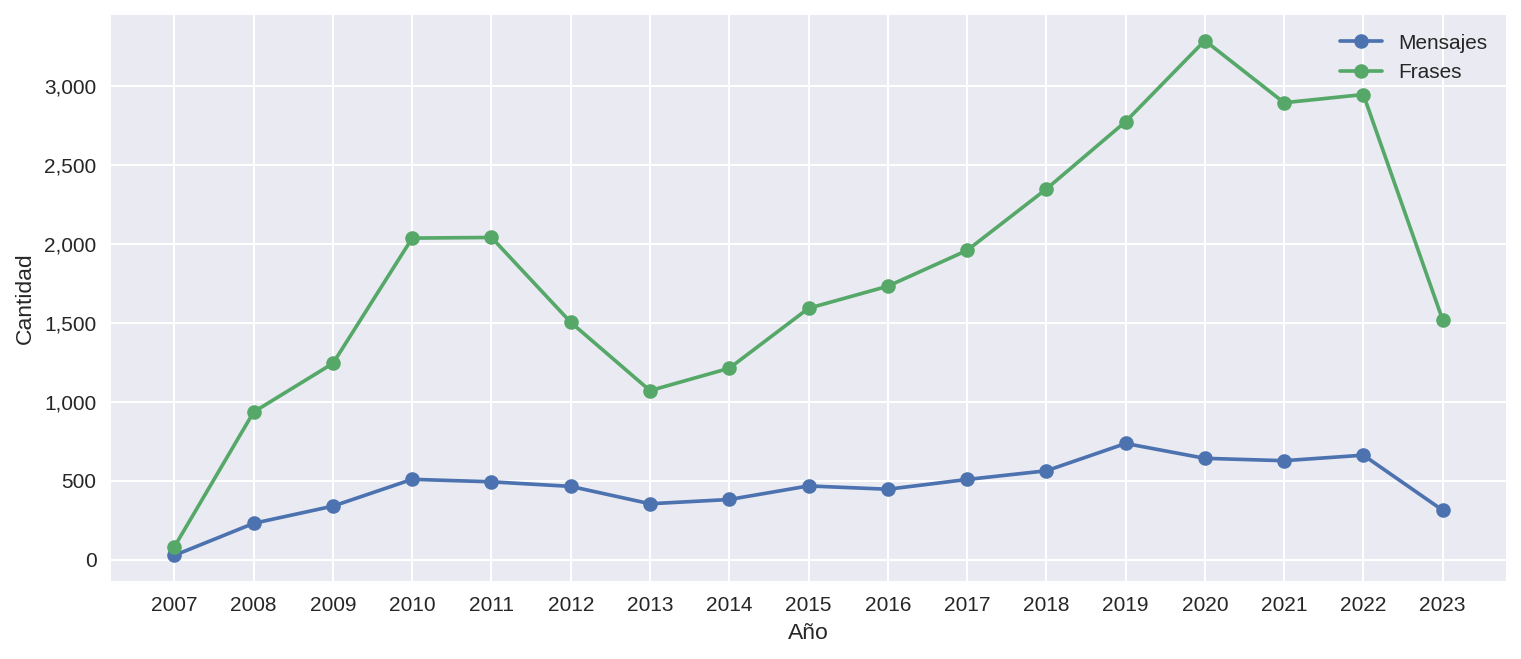

In [54]:
plt.figure(figsize=(12,5), dpi=150)
plt.plot(vc_posts["Año"], vc_posts["Cantidad de mensajes"], "o-", label="Mensajes");
plt.plot(vc_frases["Año"], vc_frases["Cantidad de frases"], "o-", label="Frases");
# plt.plot(vc_largo["year"], vc_largo["mensaje"], "o-", label="Largo de mensaje");
# plt.plot(vc_largo_frase["year"], vc_largo_frase["frases"], "o-", label="Largo de frase");
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(range(2007, 2024));
plt.legend();
plt.xlabel("Año")
plt.ylabel("Cantidad")
#plt.title(r"Cantidad de mensajes y frases por año en datos utilizados para construir $C$");

In [45]:
df_plot["tiene_sesgo"] = np.where(
    (df_plot["sesgo_pronombre"] == "SI") | (df_plot["sesgo_otro"] == "SI"), 1, 0
)

df_plot["sesgable"] = np.where(
    df_plot["sesgo_pronombre"].notna(), 1, 0
)

vc_sesgo = df_plot.groupby(["year"]).agg(porc_sesgo=("tiene_sesgo", lambda x: x.sum() / x.shape[0] * 100)).reset_index()
vc_sesgables = df_plot.groupby(["year"]).agg(porc_sesgable=("sesgable", lambda x: x.sum() / x.shape[0] * 100)).reset_index()

Text(0, 0.5, '%')

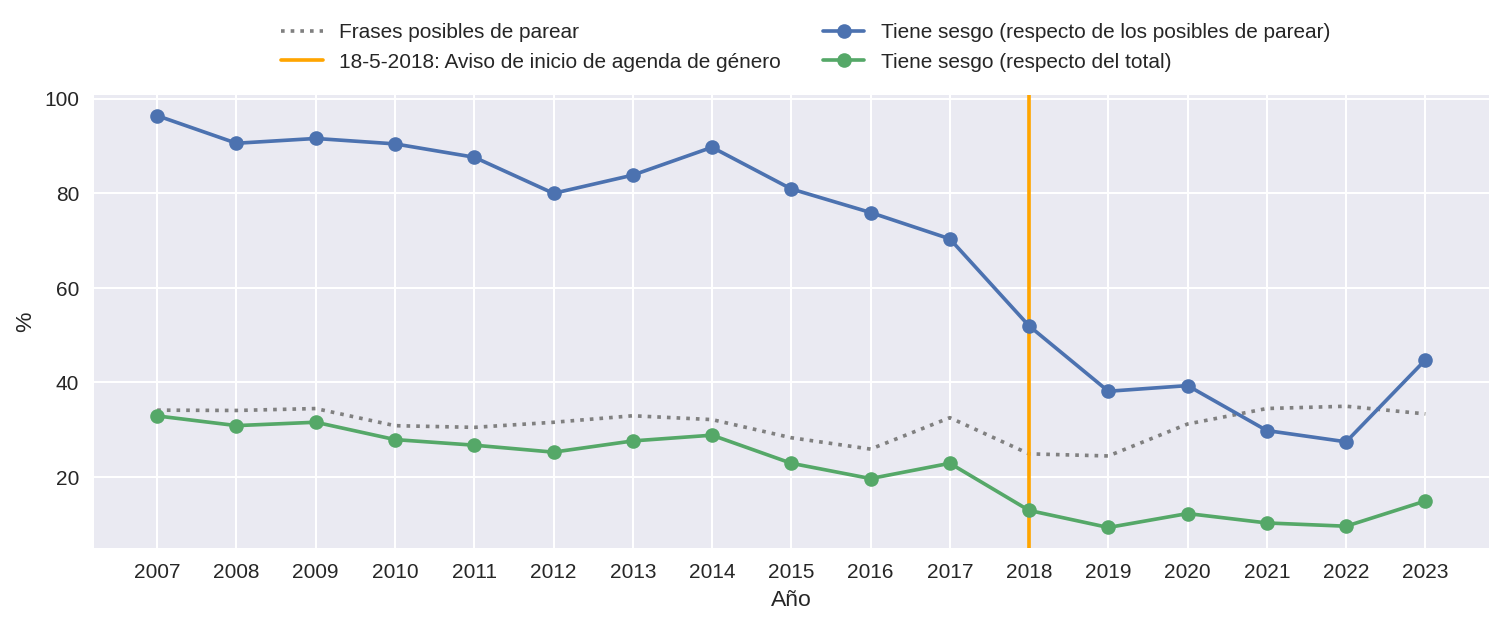

In [56]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(vc_sesgables["year"], vc_sesgables["porc_sesgable"], label="Frases posibles de parear", ls="dotted", color="grey");
plt.axvline(2018, color="orange", label="18-5-2018: Aviso de inicio de agenda de género")
plt.plot(porc_sesgo["year"], porc_sesgo["porc_ses"], "o-", label="Tiene sesgo (respecto de los posibles de parear)");
plt.plot(vc_sesgo["year"], vc_sesgo["porc_sesgo"], "o-", label="Tiene sesgo (respecto del total)");
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(range(2007, 2024));
plt.legend(ncol=2, bbox_to_anchor=(0.9, 1.2));
plt.xlabel("Año")
plt.ylabel("%")
#plt.title(r"Frecuencia de frases con sesgo de género por año, en datos utilizados para construir $C$", pad=50);

In [47]:
round(sesgable_train[
    (sesgable_train["sesgo_otro"]=="SI") |  (sesgable_train["sesgo_pronombre"]=="SI")
].shape[0] / sesgable_train.shape[0] * 100, 1), sesgable_train[
    (sesgable_train["sesgo_otro"]=="SI") |  (sesgable_train["sesgo_pronombre"]=="SI")
].shape[0],  sesgable_train[
    (sesgable_train["sesgo_otro"]=="NO") &  (sesgable_train["sesgo_pronombre"]=="NO")
].shape[0], sesgable_train.shape[0] 

(60.7, 4082, 2648, 6730)

In [48]:
round(sesgable_val[
    (sesgable_val["sesgo_otro"]=="SI") |  (sesgable_val["sesgo_pronombre"]=="SI")
].shape[0] / sesgable_val.shape[0] * 100, 1), sesgable_val[
    (sesgable_val["sesgo_otro"]=="SI") |  (sesgable_val["sesgo_pronombre"]=="SI")
].shape[0],  sesgable_val[
    (sesgable_val["sesgo_otro"]=="NO") &  (sesgable_val["sesgo_pronombre"]=="NO")
].shape[0], sesgable_val.shape[0] 

(58.9, 1698, 1184, 2882)

In [49]:
round(sesgables_test[
    (sesgables_test["sesgo_otro"]=="SI") |  (sesgables_test["sesgo_pronombre"]=="SI")
].shape[0] / sesgables_test.shape[0] * 100, 1), sesgables_test[
    (sesgables_test["sesgo_otro"]=="SI") |  (sesgables_test["sesgo_pronombre"]=="SI")
].shape[0], sesgables_test[
    (sesgables_test["sesgo_otro"]=="NO") &  (sesgables_test["sesgo_pronombre"]=="NO")
].shape[0],  sesgables_test.shape[0] 

(17.2, 58, 280, 338)

In [50]:
has_bias_plot = pd.DataFrame({
    'data': ['Entrenamiento', 'Entrenamiento', 'Validación', 'Validación', 'Prueba', 'Prueba'],
    'Tipo de frase': ['Posee sesgo', 'No posee sesgo', 'Posee sesgo', 'No posee sesgo', 'Posee sesgo', 'No posee sesgo'],
    'value': [4082, 2648, 1698, 1184, 19, 135]}
)

has_bias_plot['porcentaje'] = has_bias_plot.groupby(['data'])['value'].transform(lambda x: round(x / x.sum() * 100, 1))
has_bias_plot

,data,Tipo de frase,value,porcentaje
0,Entrenamiento,Posee sesgo,4082,60.7
1,Entrenamiento,No posee sesgo,2648,39.3
2,Validación,Posee sesgo,1698,58.9
3,Validación,No posee sesgo,1184,41.1
4,Prueba,Posee sesgo,19,12.3
5,Prueba,No posee sesgo,135,87.7


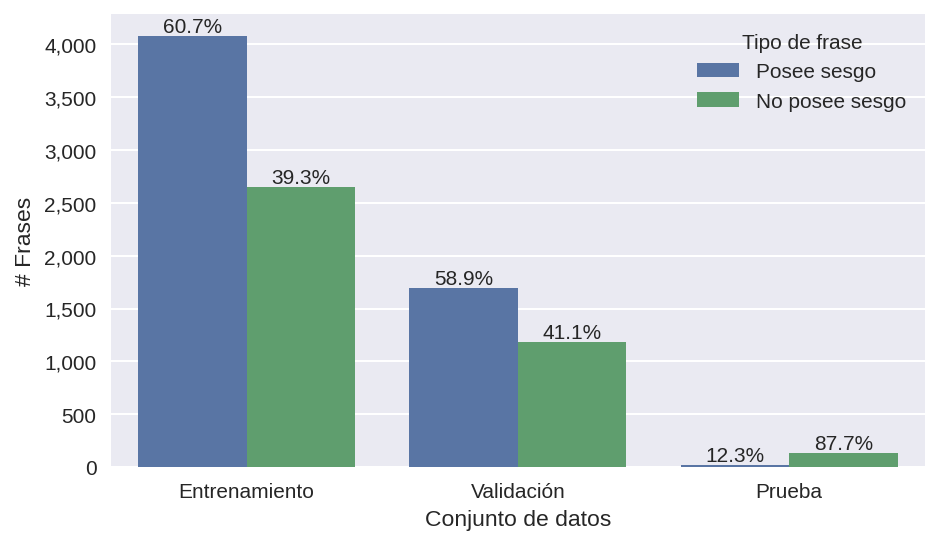

In [55]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=150)
sns.barplot(x='data', y='value', hue='Tipo de frase', data=has_bias_plot);

plt.gca().yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0], label_type='edge', labels=has_bias_plot[has_bias_plot["Tipo de frase"]=="Posee sesgo"]['porcentaje'].astype(str) + "%")
ax.bar_label(ax.containers[1], label_type='edge', labels=has_bias_plot[has_bias_plot["Tipo de frase"]=="No posee sesgo"]['porcentaje'].astype(str) + "%")

plt.ylabel("# Frases")
plt.xlabel("Conjunto de datos");
#plt.title("Cantidad de frases con y sin sesgo de género dentro de frases pareables\nutilizadas en cada conjunto de datos", pad=10);

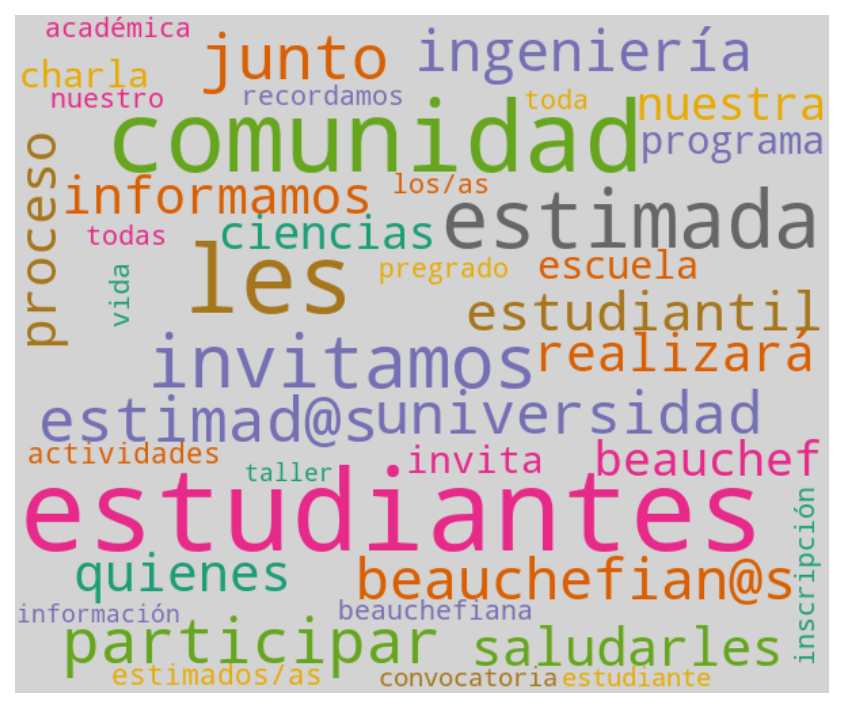

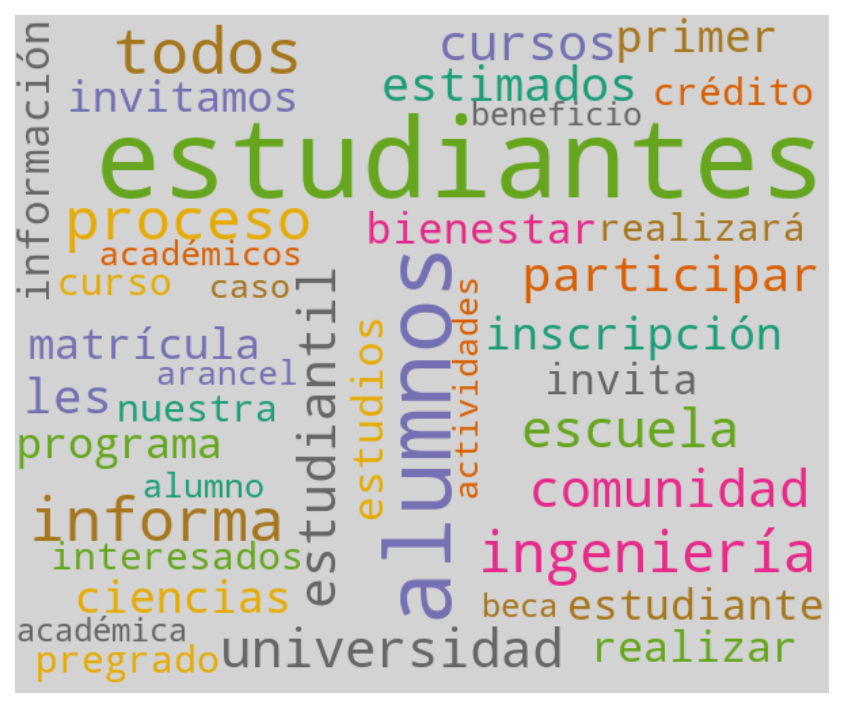

In [52]:
from collections import Counter

for i in sesgables['sesgo'].unique():  
    text = ' '.join(
        sesgables[
            sesgables['sesgo'] == i
        ]['frases'].str.lower().str.replace(",", "").str.replace(":", "")
    )
    word_freq = Counter(text.split())
    stop_words = [
        "de", "y", "la", "en", "que", "se", "el", "a", "sus", "con", "al",
        "tu", "e", "para", "hrs", "o", "lo", "los", "por", "un", "su", "te", "un",
        "del", "es", "nos", "hrs.", "abril", "miércoles", "día", "debe", "ser",
        "martes", "ha", "muy", ",", "más", "marzo", "hasta", "agosto", "octubre",
        "junio", "viernes", "si", "mayo", "ya", "hoy", "desde", "lunes", "2022",
        "jueves", "1200", "las", "no", "año", "deben", "vez", "una", "días",
        "esta", "este", "como", "entre", "chile", "kb)", "través", "han", "podrán",
        "primavera", "mañana", "pueden", "semestre", "fcfm", "sobre", "semana",
        "durante", "otoño", "horas", "facultad", "centro", "casos", "'", ".", "-"
    ]
    
    for stop_word in stop_words:
        del word_freq[stop_word]
    
    wordcloud = WordCloud(
        width=600,
        height=500,
        max_words=40,
        background_color='lightgrey',
        colormap="Dark2",
    ).generate_from_frequencies(word_freq)

    # Mostrar la nube de palabras
    plt.figure(figsize=(7, 6), dpi=150)
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.title(f'Palabras más frecuentes en frases {"con" if i else "sin"} sesgo de género' + r' en $C$')
    plt.axis('off')
    plt.show()

# Prepare data

In [53]:
df["version_con_sesgo"] = df["version_con_sesgo"].fillna(df["frases"])
df["version_sin_sesgo"] = df["version_sin_sesgo"].fillna(df["frases"])

df_pareado = df.dropna(subset="version_con_sesgo")[["version_con_sesgo", "version_sin_sesgo"]].copy()
print(df_pareado.shape)
df_pareado.head()

(31195, 2)


,version_con_sesgo,version_sin_sesgo
0,"Chilkatufe UChile mew, estudiantes mapuche U. ...","Chilkatufe UChile mew, estudiantes mapuche U. ..."
1,"Biblioteca Central, FCFM Académicas mapuche, FCFM","Biblioteca Central, FCFM Académicas mapuche, FCFM"
2,"Estimados beauchefian@s: Junto con saludarlos,...","Estimad@s beauchefian@s: Junto con saludarles,..."
3,"- Ícese la bandera de la Universidad, a media ...","- Ícese la bandera de la Universidad, a media ..."
4,"- Suspéndanse, durante dicho período, todos lo...","- Suspéndanse, durante dicho período, todos lo..."


In [78]:
df_pareado.isna().sum()

version_con_sesgo    0
version_sin_sesgo    0
dtype: int64

In [79]:
df_pareado['input'] = df_pareado.apply(lambda row: np.random.choice(row), axis=1)
df_pareado['target'] = df_pareado["version_sin_sesgo"]

# ((26425, 4), (26353, 4))
df_pareado[df_pareado["input"] == df_pareado["version_sin_sesgo"]].shape, df_pareado[df_pareado["input"] == df_pareado["version_con_sesgo"]].shape

((26425, 4), (26353, 4))

In [49]:
df_pareado = pd.read_csv("20231104_gender_bias_dataset.csv")
df_pareado.head()

,input,target
0,"Chilkatufe UChile mew, estudiantes mapuche U. ...","Chilkatufe UChile mew, estudiantes mapuche U. ..."
1,"Biblioteca Central, FCFM Académicas mapuche, FCFM","Biblioteca Central, FCFM Académicas mapuche, FCFM"
2,"Estimados beauchefian@s: Junto con saludarlos,...","Estimad@s beauchefian@s: Junto con saludarles,..."
3,"- Ícese la bandera de la Universidad, a media ...","- Ícese la bandera de la Universidad, a media ..."
4,"- Suspéndanse, durante dicho período, todos lo...","- Suspéndanse, durante dicho período, todos lo..."
